In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2022-04-25 / Aki Taanila


# Tilastollisia tunnuslukuja

Määrällisille muuttujille kannattaa laskea 

* arvojen lukumäärä
* keskiarvo
* keskihajonta
* viiden luvun yhteenveto (pienin, alaneljännes, mediaani, yläneljännes, suurin).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tyylimääritys grafiikalle
plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Korvaan joidenkin muuttujien nimet havainnollisemmilla nimillä
df = df.rename(columns={'palveluv':'palveluvuodet', 'johto':'johtoon', 'työtov':'työtovereihin',
                        'työymp':'työympäristöön', 'palkkat':'palkkaan', 'työteht':'työtehtäviin'})
df

,nro,sukup,ikä,perhe,koulutus,palveluvuodet,palkka,johtoon,työtovereihin,työympäristöön,palkkaan,työtehtäviin,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


## Describe-funktio laskee tilastolliset tunnusluvut

**Describe**-funktio laskee kaikille numeerisille muuttujille keskeiset tilastolliset tunnusluvut
* lukumäärä (count) ilmoittaa arvojen lukumäärän; rivejä, joilta tieto puuttuu ei lasketa tähän mukaan
* keskiarvo (mean)
* keskihajonta (std)
* pienin (min)
* alaneljännes (25%); neljäsosa (25 %) havainnoista on korkeintaan tämän suuruisia
* mediaani (50%); puolet (50 %) havainnoista on korkeintaan tämän suuruisia
* yläneljännes (75%); kolme neljäsosaa (75 %) havainnoista on vähintään tämän suuruisia
* suurin (max)

In [5]:
df.describe()

,nro,sukup,ikä,perhe,koulutus,palveluvuodet,palkka,johtoon,työtovereihin,työympäristöön,palkkaan,työtehtäviin,työterv,lomaosa,kuntosa,hieroja
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [6]:
# Tilastollisia tunnuslukuja valituille muuttujille
df1 = df[['ikä', 'palveluvuodet', 'palkka']].describe()

# Suomenkieliset nimet tunnusluvuille
df1.index = ['lukumäärä', 'keskiarvo', 'keskihajonta', 'pienin', 'alaneljännes', 'mediaani', 'yläneljännes', 'suurin']
df1

,ikä,palveluvuodet,palkka
lukumäärä,82.000000,80.000000,82.000000
keskiarvo,37.951220,12.175000,2563.878049
keskihajonta,9.773866,8.807038,849.350302
pienin,20.000000,0.000000,1521.000000
alaneljännes,31.000000,3.750000,2027.000000
mediaani,37.500000,12.500000,2320.000000
yläneljännes,44.000000,18.250000,2808.000000
suurin,61.000000,36.000000,6278.000000


In [7]:
# Tilastollisia tunnuslukuja tyytyväisyyksille
df2 = df.loc[:,'johtoon':'työtehtäviin'].describe()

# Sarakkeiden järjestys keskiarvon mukaan suurimmasta pienimpään
df2 = df2.sort_values('mean', axis=1, ascending=False)
df2

,työtovereihin,työympäristöön,työtehtäviin,johtoon,palkkaan
count,81.000000,82.000000,82.000000,82.000000,82.000000
mean,4.061728,3.219512,3.195122,3.060976,2.109756
std,0.826826,1.154961,1.047502,1.058155,1.111179
min,2.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,2.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,2.000000
75%,5.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
# Edellinen transponoituna
df3 = df2.T
df3

,count,mean,std,min,25%,50%,75%,max
työtovereihin,81.0,4.061728,0.826826,2.0,4.0,4.0,5.0,5.0
työympäristöön,82.0,3.219512,1.154961,1.0,3.0,3.0,4.0,5.0
työtehtäviin,82.0,3.195122,1.047502,1.0,3.0,3.0,4.0,5.0
johtoon,82.0,3.060976,1.058155,1.0,2.0,3.0,4.0,5.0
palkkaan,82.0,2.109756,1.111179,1.0,1.0,2.0,3.0,5.0


## Grafiikka

Yleisimmät esitystavat ovat
* keskiarvojen esittäminen pylväskaaviona
* viiden luvun yhteenvedon (pienin, alaneljännes, mediaani, yläneljännes, suurin) esittäminen boxplottina (ruutu- ja janakaavio).

Grafiikan läheisyydessä pitää olla tiedot siitä kuinka monen havainnon perusteella tunnusluvut on laskettu (n-arvot). Nämä löytyvät esimerkiksi describe-funktiolla lasketusta tunnuslukutaulukosta (count).

Text(0.5, 0, 'tyytyväisyyskeskiarvo (5 = erittäin tyytyväinen)')

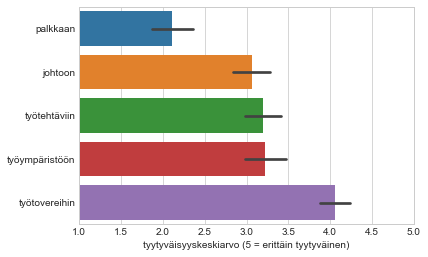

In [9]:
# Tyytyväisyysmuuttujien lista keskiarvon mukaisessa järjestyksessä
list1 = df.loc[:,'johtoon':'työtehtäviin'].mean().sort_values().index

# Keskiarvoja kuvaavat pylväät ja virhemarginaalit
sns.barplot(data=df[list1], orient='h')

# x-akselin skaalaus (pienin arvo 1, suurin arvo 5)
plt.xlim(1, 5)

plt.xlabel('tyytyväisyyskeskiarvo (5 = erittäin tyytyväinen)')

Text(0.5, 0, 'Kuukausipalkka, n = 82')

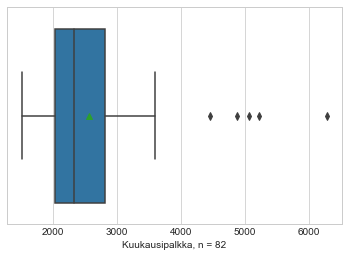

In [10]:
# Boxplot palkalle
# showmeans-parametrin ansioista myös keskiarvo (vihreä kolmio) näytetään
# Erillisinä pisteinä näytetään yli 1,5 laatikon paksuuden verran laatikon reunasta sijaitsevat pisteet
sns.boxplot(x=df['palkka'], showmeans=True)

n = df['palkka'].count()
plt.xlabel(f'Kuukausipalkka, n = {n}')

Text(0.5, 0, 'Kuukausipalkka, n = 82')

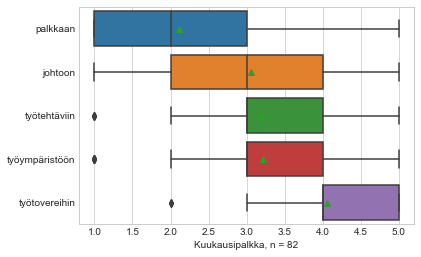

In [11]:
# Tyytyväisyyksien boxplot
# data-parametria käyttämällä saan useita muuttujia samaan boxplottiin
sns.boxplot(data=df[list1], orient='h', showmeans=True)

plt.xlabel(f'Kuukausipalkka, n = {n}')

## Lisätietoa

* https://seaborn.pydata.org/generated/seaborn.barplot.html
* https://seaborn.pydata.org/generated/seaborn.boxplot.html
    
Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/